In [1]:
#Dependencies
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from numpy import array
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
#Read Data
CSCO = pd.read_csv("CSCO.csv", date_parser=True)
CSCO

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-16,26.070000,27.000000,26.059999,26.790001,22.808805,44949600
1,2015-11-17,26.799999,27.270000,26.680000,26.809999,22.825829,30490200
2,2015-11-18,27.000000,27.160000,26.730000,27.120001,23.089760,27015700
3,2015-11-19,27.100000,27.650000,27.049999,27.370001,23.302610,27417400
4,2015-11-20,27.590000,27.780001,27.459999,27.570000,23.472891,26502800
...,...,...,...,...,...,...,...
1254,2020-11-09,39.919998,40.230000,38.119999,38.200001,38.200001,42649500
1255,2020-11-10,38.209999,39.029999,38.169998,38.720001,38.720001,31514500
1256,2020-11-11,39.009998,39.450001,38.439999,39.330002,39.330002,27332800
1257,2020-11-12,38.980000,39.389999,38.400002,38.669998,38.669998,29368300


In [3]:
#Change paramters
cut_off_date = "2019-1-1"
x_train_days = 150
num_epochs = 50
num_batch = 32
data_dim = 1
units1=50
units2=50

In [4]:
#Create Training Set based of date selected
CSCO_train_ = CSCO[CSCO["Date"]<cut_off_date].copy()

In [5]:
#Create testing set
CSCO_test = CSCO[CSCO["Date"]>cut_off_date].copy()
CSCO_test

,Date,Open,High,Low,Close,Adj Close,Volume
974,2019-10-01,49.650002,49.869999,47.360001,47.740002,45.806919,24185600
975,2019-10-02,47.349998,47.380001,46.009998,46.560001,44.674698,30722400
976,2019-10-03,46.320000,47.080002,45.700001,47.060001,45.496452,15915500
977,2019-10-04,47.250000,47.630001,46.950001,47.520000,45.941166,16718800
978,2019-10-07,47.470001,48.130001,47.320000,47.770000,46.182861,14625200
...,...,...,...,...,...,...,...
1254,2020-11-09,39.919998,40.230000,38.119999,38.200001,38.200001,42649500
1255,2020-11-10,38.209999,39.029999,38.169998,38.720001,38.720001,31514500
1256,2020-11-11,39.009998,39.450001,38.439999,39.330002,39.330002,27332800
1257,2020-11-12,38.980000,39.389999,38.400002,38.669998,38.669998,29368300


In [6]:
#Delete Unnessary Columns
train_CSCO=CSCO_train_.drop(["Adj Close","Volume","High", "Low", "Close"], axis = 1)
train_CSCO.to_csv("CSCO_Train_Data.csv")
train_CSCO=train_CSCO.drop("Date",axis = 1)

In [7]:
#Scale Data
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
CSCO_train = scalar.fit_transform(train_CSCO)
CSCO_train

array([[9.76639432e-02],
       [1.18209932e-01],
       [1.23839006e-01],
       [1.26653529e-01],
       [1.40444691e-01],
       [1.42133404e-01],
       [1.30875313e-01],
       [1.32845479e-01],
       [1.30875313e-01],
       [1.33408384e-01],
       [1.29468080e-01],
       [1.37630168e-01],
       [1.41570472e-01],
       [1.22431773e-01],
       [1.39600306e-01],
       [1.28623695e-01],
       [1.22713169e-01],
       [1.16521246e-01],
       [1.09484939e-01],
       [1.04137318e-01],
       [1.15958314e-01],
       [1.23839006e-01],
       [1.32001150e-01],
       [1.12580914e-01],
       [1.12018010e-01],
       [1.19617222e-01],
       [1.24964843e-01],
       [1.35378550e-01],
       [1.32282546e-01],
       [1.36222935e-01],
       [1.42414857e-01],
       [1.34534165e-01],
       [1.06670388e-01],
       [1.10892229e-01],
       [9.79453955e-02],
       [8.13397106e-02],
       [8.30283962e-02],
       [6.55783826e-02],
       [8.19026152e-02],
       [7.93695446e-02],


In [8]:
X_train = []
y_train = []

In [9]:
# Number of days of training data into X train and rest of data into Y train
X_train = []
y_train = []
for i in range (x_train_days,CSCO_train.shape[0]):
    X_train.append(CSCO_train[i-x_train_days:i])
    y_train.append(CSCO_train[i, 0])

In [10]:
#Create Arrays and show shape
X_train, y_train  = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((824, 150, 1), (824,))

In [11]:
#Create Model
model = Sequential()

model.add(LSTM(units=units1, activation="relu", return_sequences= True, input_shape=(X_train.shape[1],data_dim)))
model.add(Dropout(0.2))

model.add(LSTM(units=units2, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1))

In [12]:
#Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 150, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Compile Model
model.compile(optimizer="adam", loss="mean_squared_error")

In [14]:
model.fit(X_train, y_train, epochs=num_epochs, batch_size=num_batch)

Train on 824 samples
Epoch 1/50
824/824 [==============================] - 28s 34ms/sample - loss: 0.1276
Epoch 2/50
824/824 [==============================] - 18s 22ms/sample - loss: 0.0257
Epoch 3/50
824/824 [==============================] - 20s 24ms/sample - loss: 0.0132
Epoch 4/50
824/824 [==============================] - 18s 22ms/sample - loss: 0.0105
Epoch 5/50
824/824 [==============================] - 19s 23ms/sample - loss: 0.0098
Epoch 6/50
824/824 [==============================] - 19s 23ms/sample - loss: 0.0087
Epoch 7/50
824/824 [==============================] - 18s 22ms/sample - loss: 0.0089
Epoch 8/50
824/824 [==============================] - 20s 24ms/sample - loss: 0.0073
Epoch 9/50
824/824 [==============================] - 19s 23ms/sample - loss: 0.0078
Epoch 10/50
824/824 [==============================] - 18s 22ms/sample - loss: 0.0070
Epoch 11/50
824/824 [==============================] - 20s 24ms/sample - loss: 0.0066
Epoch 12/50
824/824 [=====================

In [15]:
#Add training data to test data
past_days = train_CSCO.tail(x_train_days)

In [16]:
CSCO_predict = past_days.append(CSCO_test, ignore_index = True)

In [17]:
CSCO_predict

,Open,Date,High,Low,Close,Adj Close,Volume
0,51.209999,NaN,NaN,NaN,NaN,NaN,NaN
1,51.549999,NaN,NaN,NaN,NaN,NaN,NaN
2,52.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,51.650002,NaN,NaN,NaN,NaN,NaN,NaN
4,51.119999,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
430,39.919998,2020-11-09,40.230000,38.119999,38.200001,38.200001,42649500.0
431,38.209999,2020-11-10,39.029999,38.169998,38.720001,38.720001,31514500.0
432,39.009998,2020-11-11,39.450001,38.439999,39.330002,39.330002,27332800.0
433,38.980000,2020-11-12,39.389999,38.400002,38.669998,38.669998,29368300.0


In [18]:
CSCO_predict=CSCO_predict.drop(["Adj Close","Volume","High", "Low", "Close"], axis =1)

In [19]:
#Drop unnessary rows
CSCO_predict.to_csv("CSCO_Input_Data.csv")
CSCO_predict=CSCO_predict.drop("Date", axis = 1)

In [20]:
#Transform data
inputs = scalar.transform(CSCO_predict)

In [21]:
#Create X_test data with number of days and the rest into Y test
X_test = []
y_test = []

for i in range(x_train_days, inputs.shape[0]):
    X_test.append(inputs[i-x_train_days:i])
    y_test.append(inputs[i, 0])

In [22]:
#Show shape
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((285, 150, 1), (285,))

In [23]:
#make predictions
predictions=model.predict(X_test)

In [24]:
real_predictions = scalar.inverse_transform(predictions)
CSCO_test['Date']= pd.to_datetime(CSCO_test['Date'])

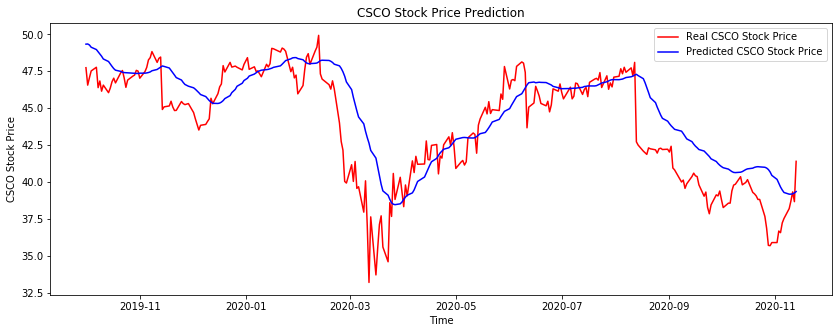

In [25]:
plt.figure(figsize=(14,5))
plt.plot(CSCO_test["Date"],CSCO_test["Close"], color = 'red', label = 'Real CSCO Stock Price')
plt.plot(CSCO_test["Date"],real_predictions, color = 'blue', label = 'Predicted CSCO Stock Price')
plt.title('CSCO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CSCO Stock Price')
plt.legend()
plt.savefig('Unadjusted')

In [26]:
CSCO_test

,Date,Open,High,Low,Close,Adj Close,Volume
974,2019-10-01,49.650002,49.869999,47.360001,47.740002,45.806919,24185600
975,2019-10-02,47.349998,47.380001,46.009998,46.560001,44.674698,30722400
976,2019-10-03,46.320000,47.080002,45.700001,47.060001,45.496452,15915500
977,2019-10-04,47.250000,47.630001,46.950001,47.520000,45.941166,16718800
978,2019-10-07,47.470001,48.130001,47.320000,47.770000,46.182861,14625200
...,...,...,...,...,...,...,...
1254,2020-11-09,39.919998,40.230000,38.119999,38.200001,38.200001,42649500
1255,2020-11-10,38.209999,39.029999,38.169998,38.720001,38.720001,31514500
1256,2020-11-11,39.009998,39.450001,38.439999,39.330002,39.330002,27332800
1257,2020-11-12,38.980000,39.389999,38.400002,38.669998,38.669998,29368300


In [27]:
import datetime
adjustment = datetime.timedelta(days=7)
CSCO_test['Date']= pd.to_datetime(CSCO_test['Date'])
CSCO_test["Adj_Date"] = CSCO_test["Date"]- adjustment

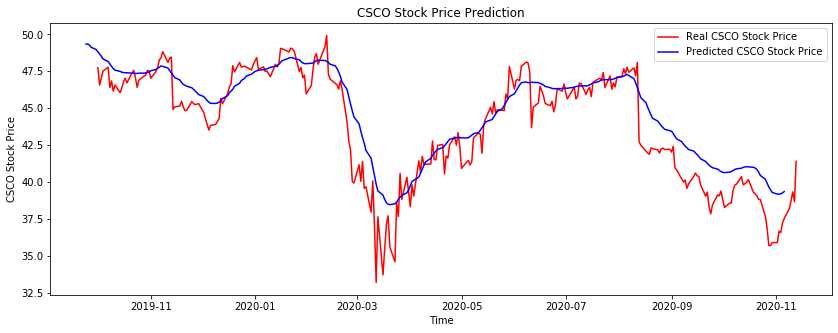

In [28]:
plt.figure(figsize=(14,5))
plt.plot(CSCO_test["Date"],CSCO_test["Close"], color = 'red', label = 'Real CSCO Stock Price')
plt.plot(CSCO_test["Adj_Date"],real_predictions, color = 'blue', label = 'Predicted CSCO Stock Price')
plt.title('CSCO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CSCO Stock Price')
plt.legend()
plt.savefig('Adjusted')

In [29]:
CSCO_data_= CSCO_test.copy()

In [30]:
CSCO_data=CSCO_data_.drop(["Open","High","Low", "Adj Close","Volume"], axis = 1) 

In [65]:
CSCO_data["Predicted_Close"]= real_predictions

In [66]:
CSCO_data.to_csv("CSCO_Predicted.csv")

In [83]:
future_data = CSCO_data.tail(165)
future_list = future_data["Close"].to_list()
future_input = np.array(future_list)

In [84]:
#future_data = CSCO_data.tail(120)
#future_list = future_data["Close"].to_list()
#future_input = np.array(future_list)

In [85]:
days_testing = 5

In [86]:
#input_data = CSCO_data.tail(days_testing)
#input_list = input_data["Predicted Close"].to_list()
#data_input = np.array(input_data)

In [87]:
input_data = CSCO_data.tail(days_testing)
input_list = input_data["Close"].to_list()
data_input = np.array(input_data)

In [88]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import TimeseriesGenerator
# define dataset
series = array(future_list)
# define generator
n_input = days_testing
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=160)
# define model
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_dim=n_input))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# fit model
model2.fit_generator(generator, steps_per_epoch=3, epochs=250, verbose=0)
# make a one step prediction out of sample
x_future = array(input_list).reshape((1, n_input))
future_prediction = model2.predict(x_future, verbose=2)

In [89]:
prediction_arrays= []
for x in range(30):
    import numpy as np
    future_prediction = np.squeeze(future_prediction)
    x_future=np.squeeze(x_future)
    x_future= np.append(x_future, future_prediction)
    x_future=np.delete(x_future, 0)
    x_future=x_future.reshape((1, n_input))
    future_prediction = model2.predict(x_future, verbose=0)
    prediction_arrays.append(future_prediction)

In [90]:
#Create Date
prediction_dates = pd.bdate_range(start='2020-11-15', end='2020-12-15')
#prediction_dates = pd.bdate_range(start='2020-15-10', end='2020-15-10')
#prediction_dates = pd.bdate_range(start='2020-11-06', end='2020-12-07')
list_dates = []
for i in prediction_dates:
    list_dates.append(i.strftime('%Y-%m-%d'))

In [91]:
prediction_list = []
for i in range(22):
    values = prediction_arrays[i][0][0]
    prediction_list.append(values)

In [92]:
len(list_dates)

22

In [93]:
#Create DataFrame
list_ = prediction_list  
future_df = pd.DataFrame(list_, columns =['Future_Values']) 

In [94]:
future_df["Dates"]=list_dates
future_df["Dates"]= pd.to_datetime(future_df["Dates"])

In [95]:
future_df

,Future_Values,Dates
0,39.711964,2020-11-16
1,39.738716,2020-11-17
2,40.059464,2020-11-18
3,39.715855,2020-11-19
4,39.811626,2020-11-20
5,39.834873,2020-11-23
6,39.866825,2020-11-24
7,39.816162,2020-11-25
8,39.839619,2020-11-26
9,39.846966,2020-11-27


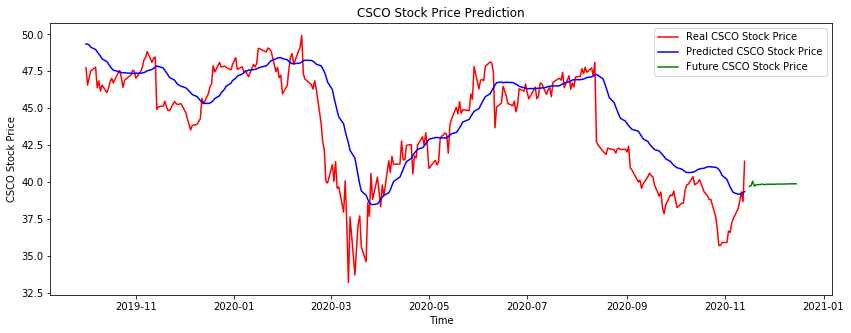

In [96]:
#Plot Values
plt.figure(figsize=(14,5))
plt.plot(CSCO_test["Date"],CSCO_test["Close"], color = 'red', label = 'Real CSCO Stock Price')
plt.plot(CSCO_test["Date"],real_predictions, color = 'blue', label = 'Predicted CSCO Stock Price')
plt.plot(future_df["Dates"],future_df["Future_Values"], color = 'green', label = 'Future CSCO Stock Price')
plt.title('CSCO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CSCO Stock Price')
plt.legend()
plt.savefig('CSCO_Future_Prediction')

In [97]:
#Save DF
future_df.to_csv("CSCO_Future_Data.csv")

In [98]:
pd.concat([future_df, CSCO_data])

,Future_Values,Dates,Date,Close,Adj_Date,Predicted_Close
0,39.711964,2020-11-16,NaT,NaN,NaT,NaN
1,39.738716,2020-11-17,NaT,NaN,NaT,NaN
2,40.059464,2020-11-18,NaT,NaN,NaT,NaN
3,39.715855,2020-11-19,NaT,NaN,NaT,NaN
4,39.811626,2020-11-20,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...
1254,NaN,NaT,2020-11-09,38.200001,2020-11-02,39.176601
1255,NaN,NaT,2020-11-10,38.720001,2020-11-03,39.178513
1256,NaN,NaT,2020-11-11,39.330002,2020-11-04,39.199402
1257,NaN,NaT,2020-11-12,38.669998,2020-11-05,39.263145
